<font color=darkblue> 

## Описание задачи
___
    
###  Нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.
### Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.. 

## Вызываю библиотеки

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

<font color=darkblue> 
# 1. Подготовка данных

In [2]:
#insurance = pd.read_csv('/Users/eugenygolovanov/Desktop/Main/Data Science/Курс/Спринт 8/Материалы проекта/insurance.csv')
insurance = pd.read_csv('/datasets/insurance.csv')

In [3]:
insurance.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


### Проверю типы

In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Пол                  5000 non-null int64
Возраст              5000 non-null float64
Зарплата             5000 non-null float64
Члены семьи          5000 non-null int64
Страховые выплаты    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


### Вывод

- Пропусков нет.
- Типы данных приведены.
- Используется верхний регистр.
- Лишних для модели данных нет.


<font color=darkblue> 
# 2. Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?

### Теоретическое обоснование:

Если:
Матрица признаков - X
Обратимая матрица - P
Вектор целевого признака - y
Вектор весов целевого признака -  w


Предсказания

a = X w

Формула обучения линейной регрессии 

w = (X^TX)^{-1}X^Tx

Преобразуем выражение для w':  

- w' = (Y^TY)^{-1} Y^Ty = 
- 
- = ((XP)^T(XP))^{-1}  (XP)^Ty =
- 
- = P^{-1}((XP)^{T}X)^{-1}  (XP)^Ty =
- 
- = P^{-1}((XP)^{T}X)^{-1}  P^TX^Ty = 
- 
- = P^{-1}(P^TX^TX)^{-1}  P^TX^Ty = 
- 
- = P^{-1}(X^TX)^{-1}(P^T)^{-1}  P^TX^Ty

Сократим

(P^{T})^{-1}  P^T = P^{-1}(X^TX)^{-1}  X^Ty

Произведем замену

w = (X^TX)^{-1}X^Ty = P^{-1}w
 
Тогда: w(y)= P^{-1}w 

Подставим для X' и w' в формулу для расчета a':

a'=X'w' = XPP^{-1}w = Xw = a

Выражения тождественны. Векторы предсказаний совпали.

### Определю признаки и обучу модель

In [5]:
features = insurance.drop('Страховые выплаты', axis=1)
target = insurance['Страховые выплаты']

In [6]:
features_train, features_test, target_train, target_test = train_test_split(features, target,
                                                                            test_size=0.4, random_state=12345)

In [7]:
model = LinearRegression().fit(features_train, target_train)
predictions = model.predict(features_test)

### R2 метрика

In [8]:
r2_score(target_test, predictions)

0.42375177725680424

### Перемножу матрицу на себя и обучу модель

In [9]:
matrix = features.values @ features.values.T

In [10]:
matrix_train, matrix_test, target_m_train, target_m_test = train_test_split(matrix, target, 
                                                                            test_size=0.4, random_state=12345)

In [11]:
model = LinearRegression().fit(matrix_train, target_m_train)
predictions = model.predict(matrix_test)

### R2 метрика

In [12]:
r2_score(target_m_test, predictions)

0.42378422248336867

<font color='purple'> 
### Поправил. Перенес далее по проекту

### Создам матрицу, эмитирующую размерность набора Features

In [13]:
matr1 = np.array([
    [1, 27, 122], 
    [2, 31, 113],
    [1, 19, 98],
    [3, 34, 130]])

### Создам случайную матрицу набора Features

In [14]:
matr2 = np.random.randint(1,50, size=(3,3))

### Произведу умножение

In [15]:
example = matr1 @ matr2

In [16]:
example

array([[6450, 2226, 4823],
       [6129, 2259, 4546],
       [5130, 1722, 3847],
       [7035, 2577, 5220]])

### Проверим соотношение между набором признаков в исходном наборе и преобразованном (между ближайшими векторами)

In [17]:
matr1[2].sum()/matr1[1].sum()

0.8082191780821918

In [18]:
example[2].sum()/example[1].sum()

0.827199628885109

### Проверим соотношение между набором признаков в исходном наборе и преобразованном (по каждому набору)

In [19]:
matr1[0].sum()/example[0].sum()

0.011111934217349434

In [20]:
matr1[1].sum()/example[1].sum()

0.011288077934127106

In [21]:
matr1[2].sum()/example[2].sum()

0.011029068137209086

In [22]:
matr1[3].sum()/example[3].sum()

0.011259439050701186

### Проверим возвращение исходной матрицы пермножением измененного дата-сета на обратную матрицу ключа шифрования

In [23]:
origin = example @ np.linalg.inv(matr2)

In [24]:
origin

array([[  1.,  27., 122.],
       [  2.,  31., 113.],
       [  1.,  19.,  98.],
       [  3.,  34., 130.]])

In [25]:
matr1

array([[  1,  27, 122],
       [  2,  31, 113],
       [  1,  19,  98],
       [  3,  34, 130]])

### Вывод:
### Как видно из отношения, вектора признаков набора данных и вектора преобразованного набора крайне близки

<font color=darkblue> 
# 3. Предложите алгоритм преобразования данных для решения задачи. Обоснуйте, почему качество линейной регрессии не поменяется.

## Алгоритм преобразования предлагаю проводить в следующем порядке.
- Отделяем целевой признак от набора данных
- Генерируем и фиксируем случайную квадратную матрицу в качестве ключа шифрования
- Производим матричное умножение набора данных и ключа шифровнаия
- Производим необходимые операции с датасетом
- Производим дешифрование с помощью матричного умножения преобразованного набора на обратную матрицу ключа шифрования

## Качество модели от перемножения на обратимую матрицу не изменится по следующей причине:

Произведение матрицы состоит из всех возможных комбинаций скалярных произведений вектор-строк матрицы Features и вектор-столбцов матрицы Random. Таким образом мы произведем умножение каждого набора признаков (строка-вектор) из Features на одинаковые наборы векторов (столбец - вектор) из Random и запишем их в новый вектор - строку. Соответственно итоговые веса каждого такого вектора будут примерно соотносится с весами набора признаков для каждого нового набора векторов в результирующей матрице. Проверю на примере ниже:

<font color=darkblue> 
# 4. Запрограммируйте алгоритм, применив матричные операции. Проверьте, что качество линейной регрессии из sklearn не отличается до и после преобразования. Примените метрику R2.

### Перемножу матрицу на случайную квадратную и обучу модель

In [26]:
random_2 = []
for i in range (50):
    try:
          i = np.random.randint(0,5, size=(4,4))
          k = np.linalg.inv(i)
          one = np.eye(4)
          m = i @ k
          if m[3].tolist() == one[3].tolist():
              if m[2].tolist() == one[2].tolist():
                  if m[1].tolist() == one[1].tolist():
                      if m[0].tolist() == one[0].tolist():
                          random_2.append(i)
    except: print('Найдена сингулярная матрица')

Найдена сингулярная матрица
Найдена сингулярная матрица


In [27]:
random = random_2[0]

In [28]:
inverse = np.linalg.inv(random)

In [29]:
random @ inverse

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [30]:
check = features.values @ random

In [31]:
check_train, check_test, target_c_train, target_c_test = train_test_split(check, target, 
                                                                            test_size=0.4, random_state=12345)

In [32]:
model = LinearRegression().fit(check_train, target_c_train)
predictions_c = model.predict(check_test)

### R2 метрика

In [33]:
r2_score(target_c_test, predictions_c)

0.423751777257544

### Дешифрую данные предсказаний

In [34]:
original = check_test @ np.linalg.inv(random)

In [35]:
a = pd.DataFrame(target_c_test)

In [36]:
b = pd.DataFrame(original, index = a.index, columns=features.columns).join(a)

In [37]:
ca = pd.DataFrame(predictions_c, index = a.index)

In [38]:
predict = []
for i in ca[0]:
    if i > 0.5:
        predict.append('1')
    else:
        predict.append('0')

In [39]:
b['Предсказания'] = predict

### Дешифрованный дата сет с предсказаниями

In [40]:
b.head(15)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты,Предсказания
3183,0.0,33.0,39000.0,4.0,0,0
1071,0.0,50.0,43100.0,2.0,2,1
2640,1.0,39.0,42100.0,0.0,0,0
2282,0.0,20.0,34800.0,0.0,0,0
1595,0.0,41.0,40000.0,4.0,0,0
4456,1.0,34.0,44800.0,0.0,0,0
3352,1.0,23.0,32200.0,5.0,0,0
3390,1.0,30.0,25000.0,1.0,0,0
3431,1.0,47.0,54200.0,3.0,1,1
298,0.0,20.0,48200.0,1.0,0,0


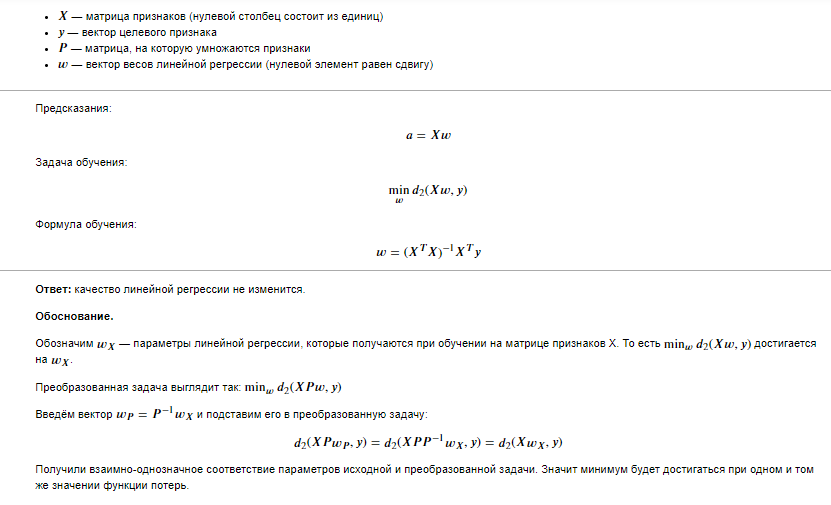